<a href="https://colab.research.google.com/github/sandvenu/GENAI-/blob/main/Resume_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [ ]:
!rm -f kaggle.json
from google.colab import files
files.upload() # Upload your Kaggle API key JSON file again

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sandvenu","key":"6a9fa9ae24be1d168f8623e9ce715634"}'}

In [ ]:
!ls -l /content/kaggle.json

-rw-r--r-- 1 root root 64 Feb 29 06:18 /content/kaggle.json


In [ ]:
#from google.colab import files
#files.upload() # Upload your Kaggle API key JSON file
!kaggle datasets download -d snehaanbhawal/resume-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!pip install dataset

In [ ]:
!pip install --upgrade accelerate
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

In [ ]:
!pip install datasets

In [8]:
# Import necessary libraries
from datasets import DatasetDict, Dataset, load_dataset
from transformers import AutoTokenizer, BertForSequenceClassification, TrainingArguments, Trainer


In [ ]:
# importing the necessary statement
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
nltk.download("punkt")
!pip install wget
import matplotlib.pyplot as plt
import warnings, wget
warnings.filterwarnings('ignore')
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")
from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct







In [6]:
!wc -l /content/Resume.csv

65381 /content/Resume.csv


In [6]:
!wc -l /content/Resume.csv

18801 /content/Resume.csv


In [ ]:
df = pd.read_csv('/content/Resume.csv', error_bad_lines=False)
df.head()

In [ ]:
!file /content/Resume.csv

In [ ]:
!file -i /content/Resume.csv

/content/Resume.csv: text/csv; charset=utf-8


In [10]:
import polars as pl
!pip install --upgrade transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextDataset, TrainingArguments, Trainer


# Try reading the CSV file, ignoring bad lines
df = pd.read_csv('/content/Resume.csv', error_bad_lines=False)
df['cleaned_resume'] = ''
df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,


In [11]:
print ("Displaying the distinct categories of resume -")
print (df['Category'].unique())

Displaying the distinct categories of resume -
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [12]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (df['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

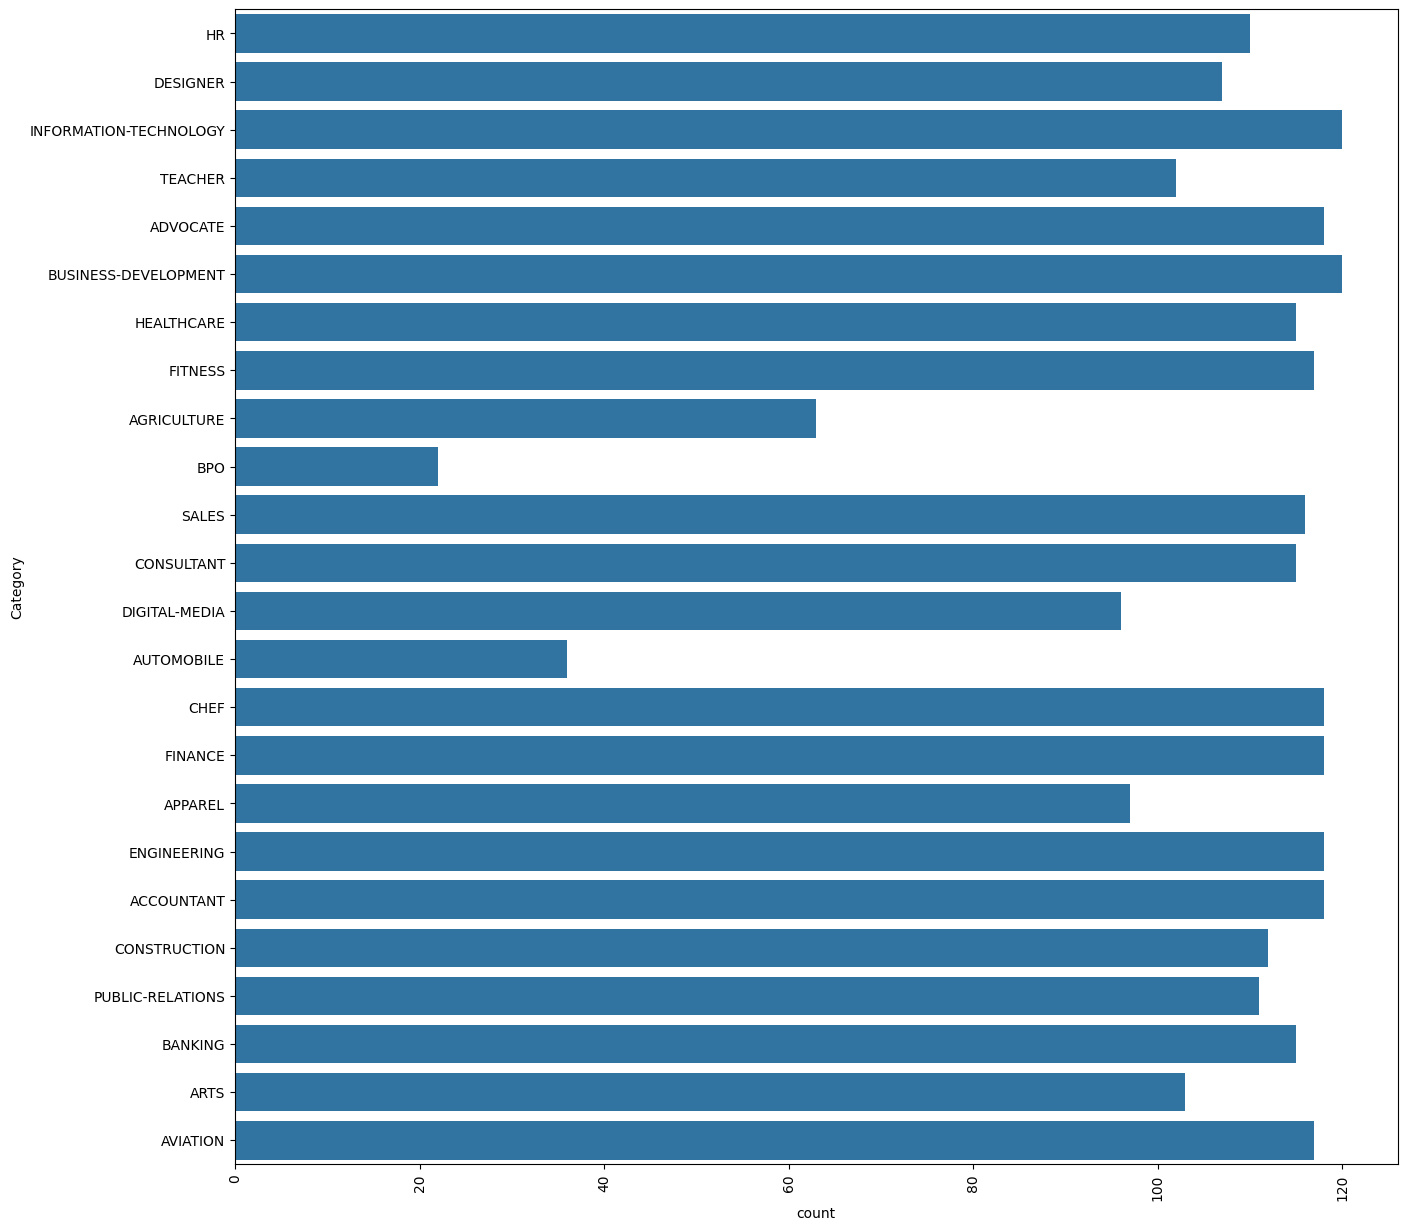

In [13]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

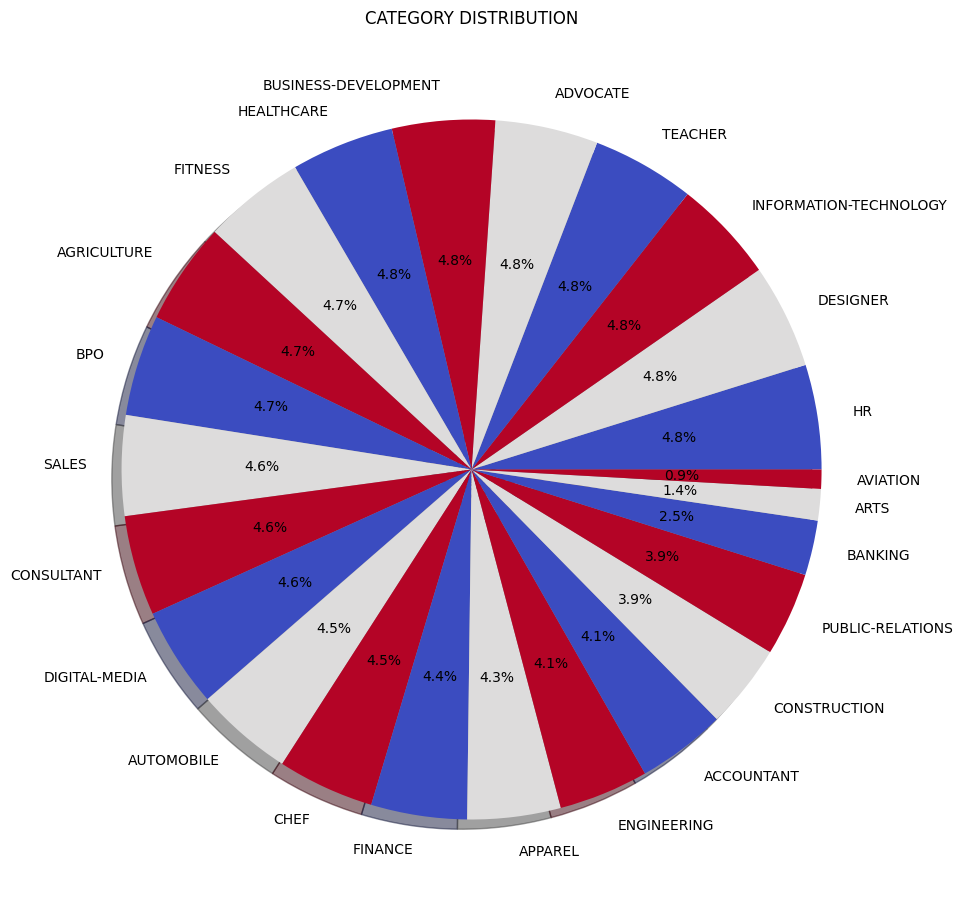

In [14]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [15]:
print("Total number of available jobs:", df.Category.nunique())

Total number of available jobs: 24


In [16]:
max_resume_len = 200

In [20]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/Resume.csv")

# Select the desired columns
df = df[["Category", "Resume_str"]]

# Create a new column named "cleaned_resume" with empty strings
df["cleaned_resume"] = ""

# Print the DataFrame
print(df.head())

  Category                                         Resume_str cleaned_resume
0       HR           HR ADMINISTRATOR/MARKETING ASSOCIATE\...               
1       HR           HR SPECIALIST, US HR OPERATIONS      ...               
2       HR           HR DIRECTOR       Summary      Over 2...               
3       HR           HR SPECIALIST       Summary    Dedica...               
4       HR           HR MANAGER         Skill Highlights  ...               


In [21]:
def preprocess_function(row):
    text = row["Resume_str"]
    label = row["Category"]
    # Convert the category to one of the predefined labels
    label_index = ["HR", "Designer", "Information-Technology", "Teacher", "Advocate", "Business-Development", "Healthcare",
                               "Fitness", "Agriculture", "BPO", "Sales", "Consultant", "Digital-Media", "Automobile", "Chef", "Finance",
                               "Apparel", "Engineering", "Accountant", "Construction", "Public-Relations", "Banking", "Arts", "Aviation"].index(label)
    return {"text": text, "labels": label_index}

In [ ]:
import pandas as pd
from datasets import Dataset, Features, Value, ClassLabel, Sequence
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np

# Load a pre-trained LLM
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define the features of the dataset
features = Features({
    "input_ids": Sequence(Value('int64')),
    "token_type_ids": Sequence(Value('int64')),
    "attention_mask": Sequence(Value('int64')),
    "labels": ClassLabel(names=["HR", "DESIGNER", "INFORMATION-TECHNOLOGY", "TEACHER", "ADVOCATE", "BUSINESS-DEVELOPMENT", "HEALTHCARE",
                               "FITNESS", "AGRICULTURE", "BPO", "SALES", "CONSULTANT", "DIGITAL-MEDIA", "AUTOMOBILE", "CHEF", "FINANCE",
                               "APPAREL", "ENGINEERING", "ACCOUNTANT", "CONSTRUCTION", "PUBLIC-RELATIONS", "BANKING", "ARTS", "AVIATION"])
})

# Load the dataset
df = pd.read_csv("/content/Resume.csv")

# Preprocess the data
def preprocess_function(row):
    text = row["Resume_str"]
    label = row["Category"].upper()
    encoding = tokenizer(text, truncation=True, padding='max_length', max_length=512)
    encoding["labels"] = label
    return encoding

dataset = df.apply(preprocess_function, axis=1).apply(pd.Series)

# Convert the dataset to Hugging Face format
hf_dataset = Dataset.from_pandas(dataset, features=features)

# Push the dataset to the Hugging Face Hub
hf_dataset.save_to_disk("resume_dataset")

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(features["labels"].names))

# Fine-tune the model on the dataset
training_args = TrainingArguments(
    output_dir="./training",
    logging_dir="./logs",
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

def compute(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

# Save the fine-tuned model
model.save_pretrained("./fine_tuned_model")

Saving the dataset (0/1 shards):   0%|          | 0/2484 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def predict_category(resume_text):
    inputs = tokenizer(resume_text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    predictions = np.argmax(outputs.logits, axis=-1)
    return predictions[0]

new_resume = "This is a resume for a software engineer with 5 years of experience in Python and Java."
predicted_category = predict_category(new_resume)
print(f